In [2]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle


# Download necessary NLTK resources

In [3]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wolfr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wolfr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Contractions dictionary

In [4]:
contractions = {
 "ain't": "am not",
 "aren't": "are not",
 "can't": "cannot",
 "can't've": "cannot have",
 "'cause": "because",
 "could've": "could have",
 "couldn't": "could not",
 "couldn't've": "could not have",
 "didn't": "did not",
 "doesn't": "does not",
 "don't": "do not",
 "hadn't": "had not",
 "hadn't've": "had not have",
 "hasn't": "has not",
 "haven't": "have not",
 "he'd": "he would",
 "he'd've": "he would have",
 "he'll": "he will",
 "he'll've": "he will have",
 "he's": "he is",
 "how'd": "how did",
 "how'd'y": "how do you",
 "how'll": "how will",
 "how's": "how does",
 "i'd": "i would",
 "i'd've": "i would have",
 "i'll": "i will",
 "i'll've": "i will have",
 "i'm": "i am",
 "i've": "i have",
 "isn't": "is not",
 "it'd": "it would",
 "it'd've": "it would have",
 "it'll": "it will",
 "it'll've": "it will have",
 "it's": "it is",
 "let's": "let us",
 "ma'am": "madam",
 "mayn't": "may not",
 "might've": "might have",
 "mightn't": "might not",
 "mightn't've": "might not have",
 "must've": "must have",
 "mustn't": "must not",
 "mustn't've": "must not have",
 "needn't": "need not",
 "needn't've": "need not have",
 "o'clock": "of the clock",
 "oughtn't": "ought not",
 "oughtn't've": "ought not have",
 "shan't": "shall not",
 "sha'n't": "shall not",
 "shan't've": "shall not have",
 "she'd": "she would",
 "she'd've": "she would have",
 "she'll": "she will",
 "she'll've": "she will have",
 "she's": "she is",
 "should've": "should have",
 "shouldn't": "should not",
 "shouldn't've": "should not have",
 "so've": "so have",
 "so's": "so is",
 "that'd": "that would",
 "that'd've": "that would have",
 "that's": "that is",
 "there'd": "there would",
 "there'd've": "there would have",
 "there's": "there is",
 "they'd": "they would",
 "they'd've": "they would have",
 "they'll": "they will",
 "they'll've": "they will have",
 "they're": "they are",
 "they've": "they have",
 "to've": "to have",
 "wasn't": "was not",
 " u ": " you ",
 " ur ": " your ",
 " n ": " and ",
 "won't": "would not",
 'dis': 'this',
 'bak': 'back',
 'brng': 'bring',
 "won't":"would not",
  'dis':'this',
 "bak":"back",
 "brng":'bring',
 "i'v" : 'i have'
 }


# Function to expand contractions

In [5]:
def expand_contractions(text):
    for key in contractions:
        text = text.replace(key, contractions[key])
    return text

# Function to clean text

In [6]:
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text  # Remove HTML content
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = expand_contractions(text)  # Expand contractions
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  # Remove accented chars
    return text

# Remove stopwords

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Load data

In [8]:
data = pd.read_csv('C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Twitter_Sentiment_Analysis/dataset/twitter_new.csv', encoding='ISO-8859-1')
data.columns = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']


# Preprocess data

In [9]:
data['Tweet'] = data['Tweet'].apply(clean_text)
data['Tweet'] = data['Tweet'].apply(remove_stopwords)


C:\Users\wolfr\AppData\Local\Temp\ipykernel_14432\3081877112.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text  # Remove HTML content


# Vectorization

In [10]:
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
features = vectorizer.fit_transform(data['Tweet'])

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, data['Sentiment'], test_size=0.2, random_state=42)

# Model training - Logistic Regression

In [12]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Model training - Linear SVC

In [13]:
svc_model = LinearSVC(random_state=0)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

c:\Users\wolfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Evaluation

In [14]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Report:\n", classification_report(y_test, logistic_predictions))
print("Linear SVC Accuracy:", accuracy_score(y_test, svc_predictions))
print("Linear SVC Report:\n", classification_report(y_test, svc_predictions))


Logistic Regression Accuracy: 0.739265625
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73    159494
           4       0.73      0.77      0.75    160506

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000

Linear SVC Accuracy: 0.73889375
Linear SVC Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73    159494
           4       0.72      0.77      0.75    160506

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



# Generate word clouds for visual analysis

In [15]:
def generate_word_cloud(data, sentiment):
    text = ' '.join(tweet for tweet in data[data['Sentiment'] == sentiment]['Tweet'])
    word_cloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Sentiment {}'.format(sentiment))
    plt.show()

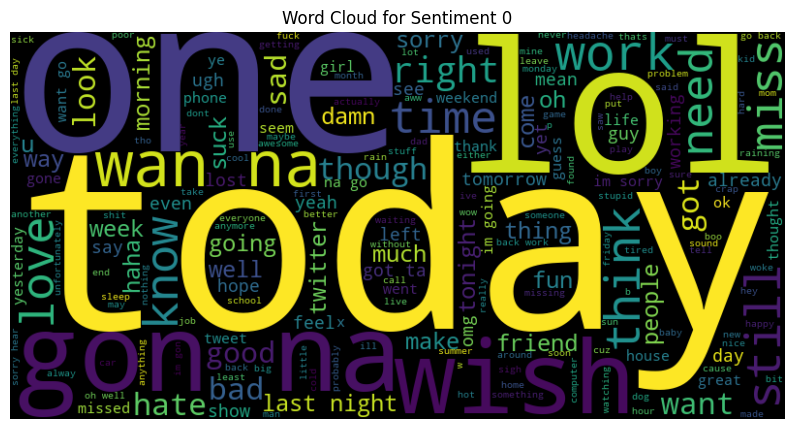

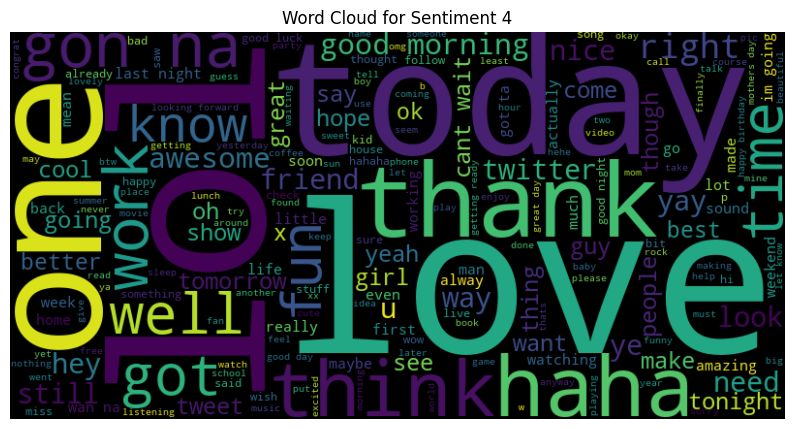

In [20]:
generate_word_cloud(data, 0)  # Negative sentiment
generate_word_cloud(data, 4)  # Positive sentiment
#generate_word_cloud(data, 2)  # Neutral sentiment

# Serialize models

In [17]:
pickle.dump(logistic_model, open('logistic_model.pkl', 'wb'))
pickle.dump(svc_model, open('svc_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Load model example (if needed)

In [18]:
loaded_model = pickle.load(open('logistic_model.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
test_text = ["happy to be part of this!"]
transformed_text = loaded_vectorizer.transform(test_text)
print("Test Prediction:", loaded_model.predict(transformed_text))


Test Prediction: [4]
